In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.decomposition import SparsePCA, NMF
from sklearn.metrics import mean_squared_error #explained_variance_score

from scipy.sparse import csr_matrix

## Dimensionality Reduction on 1011 Venue Categories

In [2]:
vficf = pd.read_csv('data/vficf.csv', index_col=0)
vficf

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zhejiang Restaurant,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи."""
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000066,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000240,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000261,0.000302,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000504,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000134,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Makasar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
vficf_matrix = csr_matrix(vficf)
vficf_matrix

<250x1011 sparse matrix of type '<class 'numpy.float64'>'
	with 88480 stored elements in Compressed Sparse Row format>

In [6]:
X = vficf_matrix

nmf_results = []

for i in range(1,101):
    
    folds = KFold(n_splits=5)
    train_scores = []
    test_scores = []

    for train_index, test_index in folds.split(X):
        X_train, X_test = X[train_index], X[test_index]

        model = NMF(n_components=i)

        model.fit(X_train)
        nmf_features = model.transform(X_train)
        
        predict_train = model.inverse_transform(model.transform(X_train))
        score_train = mean_squared_error(X_train.toarray(), predict_train)
        train_scores.append(score_train)

        predict_test = model.inverse_transform(model.transform(X_test))
        score_test = mean_squared_error(X_test.toarray(), predict_test)
        test_scores.append(score_test)

#         nmf_dict[i][test_index]['features'] = nmf_features
#         nmf_dict[i][test_index]['components'] = model.components_
        
        # Print the NMF features
#         print('FEATURES', nmf_features)
#         print('COMPONENTS', model.components_)
        
    nmf_results.append({'train_score': np.mean(train_scores), 'test_score': np.mean(test_scores)})

results = [(r.get('train_score'), r.get('test_score')) for r in nmf_results]
results[0:5]

[(1.5529277496826109e-06, 1.5928430081923573e-06),
 (1.4055853722103882e-06, 1.4486881705525544e-06),
 (1.2976377067002132e-06, 1.3729622282948109e-06),
 (1.2064806021875229e-06, 1.3284554219073635e-06),
 (1.128520658742199e-06, 1.28009491292853e-06)]

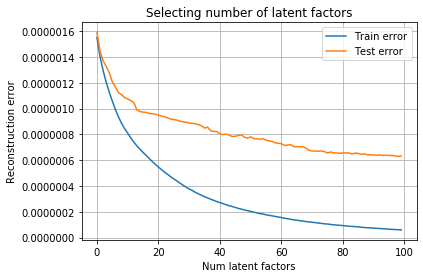

In [13]:
plt.plot(results)
plt.title('Selecting number of latent factors')
plt.xlabel('Num latent factors')
plt.ylabel('Reconstruction error')
plt.grid()
plt.legend(['Train error', 'Test error'])
plt.show()

In [11]:
plt.legend?

#### While we do not see , we see two corners at 13 and 16 components.